In [1]:
!pip install tmdbsimple

In [2]:
import json
with open('/Users/DELL/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()



dict_keys(['api-key'])

In [3]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [4]:
info = tmdb.Movies('tt0848228').info()
info

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'origin_country': ['US'],
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 201.602,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies':

In [5]:
info['budget']

220000000

In [6]:
info['revenue']

1518815515

In [7]:
# Get the movie object for the current id
def get_movie_with_rating (movie_id):
    movie = tmdb.Movies(movie_id) 
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1' ] =='US':
            info['certification'] = c['certification']
    return info                

In [8]:
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'origin_country': ['US'],
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 201.602,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies':

In [9]:
import pandas as pd
title_basics = pd.read_csv(r'C:\Users\DELL\Documents\GitHub\Business-Problem\Data\filtered_movies_basics.csv')
title_basics.info()
title_basics.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87077 entries, 0 to 87076
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          87077 non-null  object 
 1   titleType       87077 non-null  object 
 2   primaryTitle    87077 non-null  object 
 3   originalTitle   87077 non-null  object 
 4   isAdult         87077 non-null  int64  
 5   startYear       87077 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  87077 non-null  int64  
 8   genres          87077 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.0+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [10]:
def fetch_movie_data(imdb_id, api_key):
    # Construct the TMDB API URL
    url = f'https://api.themoviedb.org/3/find/{imdb_id}?api_key={api_key}&external_source=imdb_id'
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to fetch data for IMDb ID {imdb_id}")
        return None
    
    # Parse the JSON response
    data = response.json()
    
    # Extract the TMDB ID from the response
    if 'movie_results' in data and len(data['movie_results']) > 0:
        tmdb_id = data['movie_results'][0]['id']
    else:
        print(f"No TMDB ID found for IMDb ID {imdb_id}")
        return None
    
    # Fetch detailed movie data including certification using the TMDB ID
    movie_data = get_movie_with_rating(tmdb_id)
    return movie_data


In [11]:
import requests
import json
def append_to_json_file(file_path, new_data):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
    except FileNotFoundError:
        data = {}
    data.update(new_data)
    with open(file_path, 'w') as file:
        json.dump(data, file)


In [12]:
api_key = '3a4647abf8c92791ce50e04f8e0798ab'  # Replace with your actual API key
test_ids = ['tt0848228', 'tt0332280']  # The Avengers and The Notebook

for test_id in test_ids:
    result = fetch_movie_data(test_id, api_key)
    print(result)

{'adult': False, 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg', 'belongs_to_collection': {'id': 86311, 'name': 'The Avengers Collection', 'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg', 'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'}, 'budget': 220000000, 'genres': [{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}], 'homepage': 'https://www.marvel.com/movies/the-avengers', 'id': 24428, 'imdb_id': 'tt0848228', 'origin_country': ['US'], 'original_language': 'en', 'original_title': 'The Avengers', 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!', 'popularity': 201.602, 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg', 'production_companies': [{'id': 420, 'logo_path

In [13]:
import os
import pandas as pd
from tqdm.notebook import tqdm

# Define the folder to save your information
save_folder = 'movie_data'
os.makedirs(save_folder, exist_ok=True)  # Create the directory if it doesn't exist
years_to_get = [2001, 2002]
api_key = '3a4647abf8c92791ce50e04f8e0798ab'

for year in tqdm(years_to_get, desc='Years'):
    json_filename = os.path.join(save_folder, f'movies_{year}.json')
    
    if not os.path.exists(json_filename):
        with open(json_filename, 'w') as f:
            json.dump({}, f)
        print(f'Created new file for year {year}')
    else:
        print(f'File for year {year} already exists')
    
    movies_ids = title_basics[title_basics['startYear'] == year]['tconst'].tolist()
    
    with open(json_filename, 'r') as f:
        existing_data = json.load(f)
    
    movie_ids_to_get = [mid for mid in movies_ids if mid not in existing_data]

    for imdb_id in tqdm(movie_ids_to_get, desc=f'Movies {year}'):
        movie_data = fetch_movie_data(imdb_id, api_key)
        if movie_data:
            append_to_json_file(json_filename, {imdb_id: movie_data})
    
    # Convert JSON to DataFrame properly
    with open(json_filename, 'r') as f:
        existing_data = json.load(f)
    data_list = [existing_data[key] for key in existing_data]
    final_df = pd.DataFrame(data_list)
    final_df.to_csv(os.path.join(save_folder, f'movies_{year}.csv.gz'), index=False, compression='gzip')


Years:   0%|          | 0/2 [00:00<?, ?it/s]

File for year 2001 already exists


Movies 2001:   0%|          | 0/1323 [00:00<?, ?it/s]

No TMDB ID found for IMDb ID tt0138856
No TMDB ID found for IMDb ID tt0151685
No TMDB ID found for IMDb ID tt0160270
No TMDB ID found for IMDb ID tt0160480
No TMDB ID found for IMDb ID tt0192110
No TMDB ID found for IMDb ID tt0193365
No TMDB ID found for IMDb ID tt0193537
No TMDB ID found for IMDb ID tt0195108
No TMDB ID found for IMDb ID tt0198748
No TMDB ID found for IMDb ID tt0200525
No TMDB ID found for IMDb ID tt0203206
No TMDB ID found for IMDb ID tt0206211
No TMDB ID found for IMDb ID tt0211279
No TMDB ID found for IMDb ID tt0215719
No TMDB ID found for IMDb ID tt0216290
No TMDB ID found for IMDb ID tt0217664
No TMDB ID found for IMDb ID tt0237199
No TMDB ID found for IMDb ID tt0246076
No TMDB ID found for IMDb ID tt0246409
No TMDB ID found for IMDb ID tt0247389
No TMDB ID found for IMDb ID tt0248017
No TMDB ID found for IMDb ID tt0254448
No TMDB ID found for IMDb ID tt0255348
No TMDB ID found for IMDb ID tt0256766
No TMDB ID found for IMDb ID tt0257947
No TMDB ID found for IMDb

Movies 2002:   0%|          | 0/1586 [00:00<?, ?it/s]

No TMDB ID found for IMDb ID tt0128216
No TMDB ID found for IMDb ID tt0139297
No TMDB ID found for IMDb ID tt0152772
No TMDB ID found for IMDb ID tt0154187
No TMDB ID found for IMDb ID tt0181430
No TMDB ID found for IMDb ID tt0192789
No TMDB ID found for IMDb ID tt0193598
No TMDB ID found for IMDb ID tt0206778
No TMDB ID found for IMDb ID tt0220607
No TMDB ID found for IMDb ID tt0229567
No TMDB ID found for IMDb ID tt0251163
No TMDB ID found for IMDb ID tt0253016
No TMDB ID found for IMDb ID tt0253933
No TMDB ID found for IMDb ID tt0268992
No TMDB ID found for IMDb ID tt0281209
No TMDB ID found for IMDb ID tt0281231
No TMDB ID found for IMDb ID tt0284323
No TMDB ID found for IMDb ID tt0284664
No TMDB ID found for IMDb ID tt0287335
No TMDB ID found for IMDb ID tt0295456
No TMDB ID found for IMDb ID tt0296889
No TMDB ID found for IMDb ID tt0296933
No TMDB ID found for IMDb ID tt0298516
No TMDB ID found for IMDb ID tt0299689
No TMDB ID found for IMDb ID tt0300196
No TMDB ID found for IMDb

In [14]:
import glob
tmdb_files = sorted(glob.glob(os.path.join(save_folder, "movies_*.csv.gz")))
df = pd.concat([pd.read_csv(f) for f in tmdb_files])
df.to_csv(os.path.join(save_folder, "tmdb_results_combined.csv.gz"), index=False, compression='gzip')


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(os.path.join(save_folder, "tmdb_results_combined.csv.gz"))
df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'certification'],
      dtype='object')

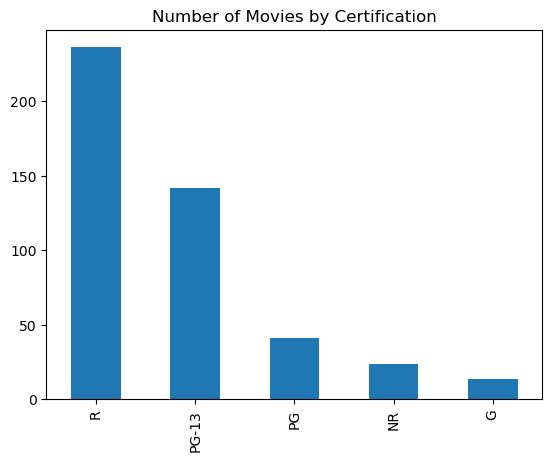

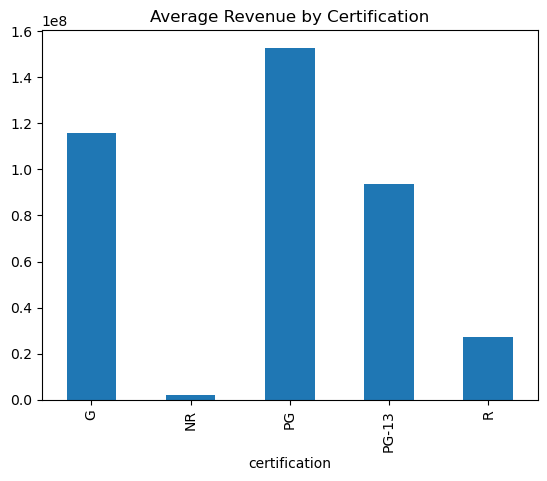

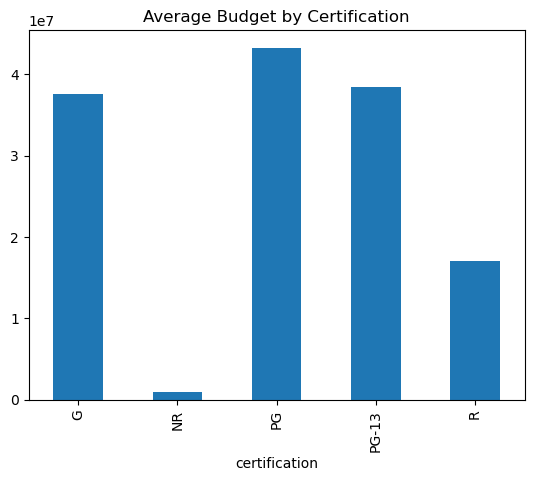

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(os.path.join(save_folder, "tmdb_results_combined.csv.gz"))

# Check if 'certification' column exists
if 'certification' not in df.columns:
    print("Certification data is missing in the DataFrame.")
else:
    valid_financials = df[(df['budget'] > 0) | (df['revenue'] > 0)]
    financials = valid_financials[(valid_financials['budget'] > 0) | (valid_financials['revenue'] > 0)]

    certification_counts = financials['certification'].value_counts()
    avg_revenue_by_certification = financials.groupby('certification')['revenue'].mean()
    avg_budget_by_certification = financials.groupby('certification')['budget'].mean()

    certification_counts.plot(kind='bar', title='Number of Movies by Certification')
    plt.show()

    avg_revenue_by_certification.plot(kind='bar', title='Average Revenue by Certification')
    plt.show()

    avg_budget_by_certification.plot(kind='bar', title='Average Budget by Certification')
    plt.show()

    df.to_csv(os.path.join(save_folder, "tmdb_results_combined.csv.gz"), index=False, compression='gzip')
